Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import warnings 
warnings.filterwarnings('ignore')
# importing various libraries

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# files are located in zip folder. So lets unzip them
# zip file is located in "My Drive" folder
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/gdrive/My Drive/CNN_assignment.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/dataset') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
# lets print the number of images in train and test directories
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
# As per problem statement in assignment, there are total 2357 images.
# If we add up images in train and test folder, we get 2239 + 118 = 2357 images. 
# thus matches with number given in assignment problem statement
# here, 2239/2357 * 100 ~ 95%
# thus around 95% images constitute train data while 5% images constitute test data

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_height,img_width),batch_size=(batch_size), seed=123,label_mode='categorical') ##todo
# we have chosen img_height, img_width, batch_size, seed as suggested in notebook.
# we have chosen label_mode = categorical as it is categorical data. It also implies labels are encoded as categorical vector for that categorical_entropy loss.
# we could have used another parameter : validation_split to specify split of training data into training and validation data to achieve 80-20 split
# however, as we are given seperate test directory, we will use same for validation instead of using validation_split option in this utility. 

Found 2239 files belonging to 9 classes.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,image_size=(img_height,img_width),batch_size=(batch_size), seed=123, label_mode='categorical') ##todo

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [11]:
# our strategy will be- to first obtain individual image path of each image in each of the sub-folder
# then we can use these paths to visualize 1 instance of each class
# we will perform this activity for training directory 

In [12]:
from glob import glob
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list_original
# below is the pathlist of all images in training directory 

['/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000402.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010546.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010803.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000444.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000291.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000404.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010423.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000519.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010610.jpg',
 '/dataset/Skin cancer ISIC The Inter

In [13]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list_original
# for each image, its class is obtained

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [14]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))
dataframe_dict_original
# dictonary is created which contains path and label as a list of key, value pair

{'/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000402.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010546.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010803.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000444.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000291.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000404.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0010423.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000519.jpg': 'melanoma',
 '/dataset/Skin cancer ISIC The International Sk

In [15]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df
# dictonary is converted into dataframe

,Path,Label
0,/dataset/Skin cancer ISIC The International Sk...,melanoma
1,/dataset/Skin cancer ISIC The International Sk...,melanoma
2,/dataset/Skin cancer ISIC The International Sk...,melanoma
3,/dataset/Skin cancer ISIC The International Sk...,melanoma
4,/dataset/Skin cancer ISIC The International Sk...,melanoma
...,...,...
2234,/dataset/Skin cancer ISIC The International Sk...,dermatofibroma
2235,/dataset/Skin cancer ISIC The International Sk...,dermatofibroma
2236,/dataset/Skin cancer ISIC The International Sk...,dermatofibroma
2237,/dataset/Skin cancer ISIC The International Sk...,dermatofibroma


In [16]:
name_of_1st_file_each_type=[]
for i in class_names:
  name_of_1st_file_each_type.append(original_df.loc[original_df['Label'] == i, 'Path'] .iloc[0])
name_of_1st_file_each_type
# from dataframe, we have created a list which contains 1 instance of each class

['/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029460.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/ISIC_0030644.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0029052.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000402.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000227.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0024890.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/ISIC_0011095.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0030158.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Tr

In [17]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

for i in name_of_1st_file_each_type :
  plt.figure(figsize=(10, 10))
  image = imread(i)
  plt.title(os.path.basename(os.path.dirname(i)))
	# plot raw pixel data
  pyplot.imshow(image)
  # show the figure
  pyplot.show()
 # we can plot now 1 instance of each class using list obtained in previous step
 # these are printed from training dataset

### your code goes here, you can use training or validation data to visualize

Output hidden; open in https://colab.research.google.com to view.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
### Your code goes here

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),


  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),


  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  


  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),


  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  layers.Dense(2048, activation='relu'),
  layers.Dense(1000, activation='relu'),
  

  layers.Dense(num_classes, activation='softmax')
])
# total 15 weight layers used
# dropout layer and batch-normalization layers are neglected for now
# we will call this model1 for our future discussions

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
### Todo, choose an appropirate optimiser and loss function


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                        

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 73s 473ms/step - loss: 2.3764 - accuracy: 0.2063 - val_loss: 2.2872 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 18s 257ms/step - loss: 2.0254 - accuracy: 0.2001 - val_loss: 2.2653 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 18s 262ms/step - loss: 2.0252 - accuracy: 0.1992 - val_loss: 2.2799 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 19s 266ms/step - loss: 2.0209 - accuracy: 0.2068 - val_loss: 2.2240 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 19s 271ms/step - loss: 2.0246 - accuracy: 0.1987 - val_loss: 2.2581 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 18s 262ms/step - loss: 2.0221 - accuracy: 0.1970 - val_loss: 2.2050 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 18s 259ms/step - loss: 2.0213 - accuracy: 0.2090 - val_loss: 2.2695 - val_accuracy: 0.1356

### Visualizing training results

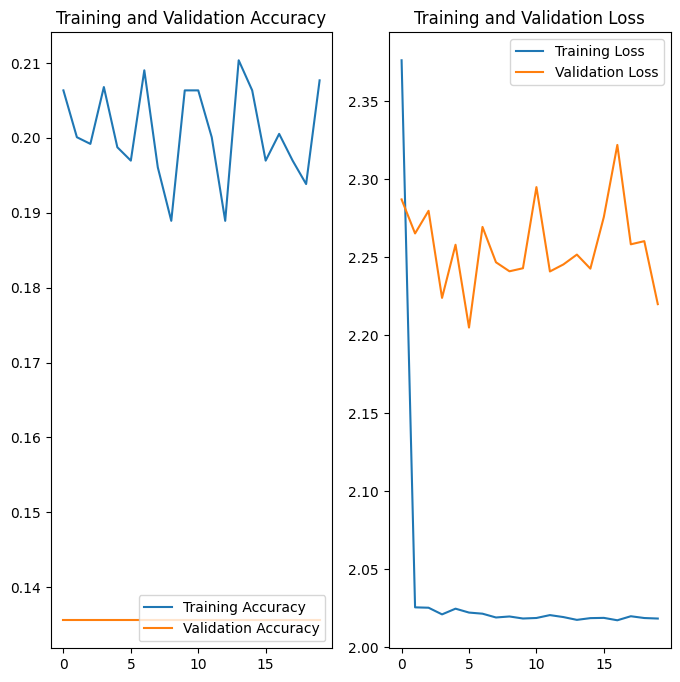

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [24]:
# Findings : Both training and testing accuracy are in the range of  20% or less
# this is significantly low accuracy
# model is clearly underfitting
# as an attemp of improvement, we try augmentation strategy to see if it helps. 
#(though typically augmentation strategy is known to help more in case of overfitting than underfitting based upon google search. see link below )
# (https://towardsdatascience.com/balancing-the-regularization-effect-of-data-augmentation-eb551be48374)
# (however, as assignment explictly asks to try out augmentation strategy, we will see if it helps)


In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
# we will use randomflip and random rotation as our augmentation strategy

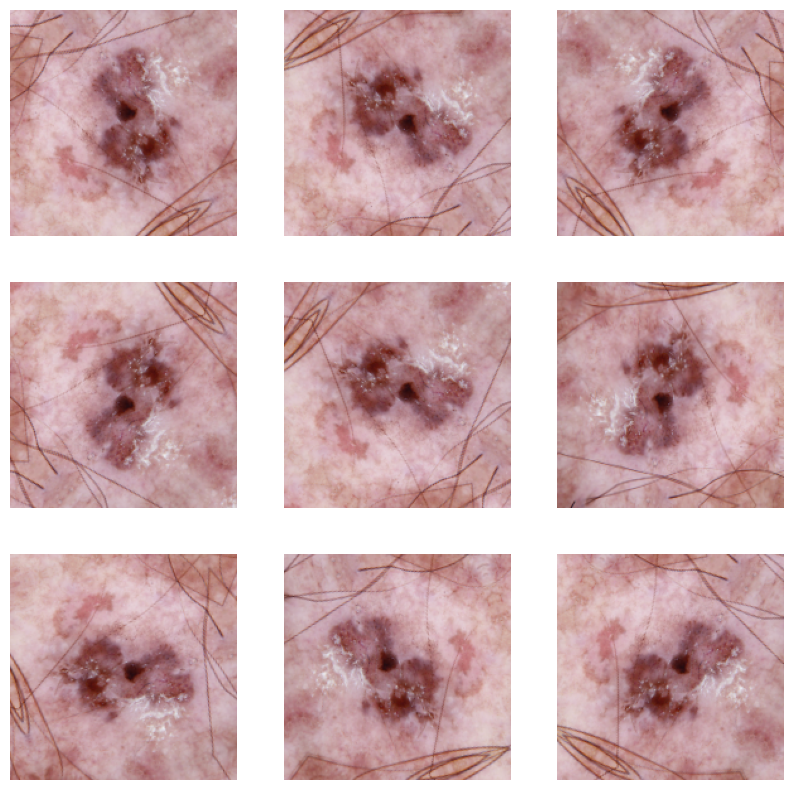

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images=data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    #plt.title(class_names[labels[0]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# what we saw is - over model grossly underfits.
# drop-outs are primarily used when there is strong evidence of overfitting
# as our priority presently is to avoid underfitting and not the overfitting, we will not make use of drop-out layer as of now
# note that in case, underfitting issue is resolved with augmentation strategy deployed and overfitting comes into picture,
# we can always add drop-out layers and perform additional iteration to see if it improves the model.
# hence, it makes sense to avoid drop out layer for now. 
# (however, we have shown where we would place drop-out layer if needed. THese are not executed though as we have used '#' to prevent them from executing)

## Your code goes here

num_classes = 9

model = Sequential([
  data_augmentation,  # augmentation layer used here

  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
 #layers.Dropout(0.25),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  #layers.Dropout(0.25),
  layers.Dense(2048, activation='relu'),
  #layers.Dropout(0.25),
  layers.Dense(1000, activation='relu'),
  #layers.Dropout(0.25),

  layers.Dense(num_classes, activation='softmax')
])

#  aumentation layer has been included 
# batch normalization layers neglected for now
# we will call this as model2 for our future discussions

### Compiling the model

In [28]:
## Your code goes here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
# history = ## your training code
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 25s 275ms/step - loss: 2.1686 - accuracy: 0.1871 - val_loss: 2.3865 - val_accuracy: 0.1356
Epoch 2/20
70/70 [==============================] - 19s 269ms/step - loss: 2.0255 - accuracy: 0.1987 - val_loss: 2.2118 - val_accuracy: 0.1356
Epoch 3/20
70/70 [==============================] - 18s 264ms/step - loss: 2.0218 - accuracy: 0.2099 - val_loss: 2.2029 - val_accuracy: 0.1356
Epoch 4/20
70/70 [==============================] - 18s 260ms/step - loss: 2.0250 - accuracy: 0.1907 - val_loss: 2.2341 - val_accuracy: 0.1356
Epoch 5/20
70/70 [==============================] - 18s 259ms/step - loss: 2.0206 - accuracy: 0.2050 - val_loss: 2.2730 - val_accuracy: 0.1356
Epoch 6/20
70/70 [==============================] - 19s 266ms/step - loss: 2.0224 - accuracy: 0.1876 - val_loss: 2.3015 - val_accuracy: 0.1356
Epoch 7/20
70/70 [==============================] - 18s 262ms/step - loss: 2.0208 - accuracy: 0.2028 - val_loss: 2.2404 - val_accuracy: 0.1356

### Visualizing the results

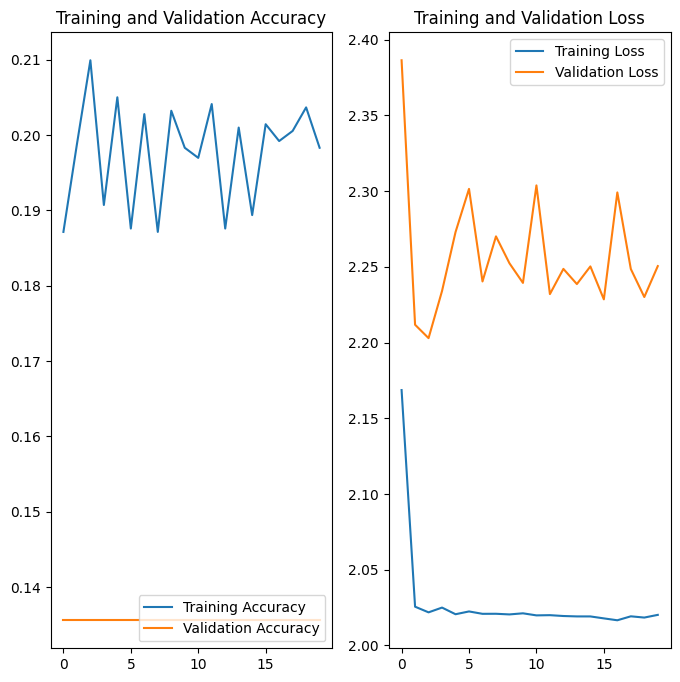

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [31]:
# Findings : Model continues to underfit. Accuracy of the model has not improved much even for training dataset as even training accuracy is low
# one of the reason for low quality model might be high class imbalance
# so lets try to undersatnd distribution of classes and fix class imbalance if any to see if it helps us with the results

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [32]:
## Your code goes here.
image_dict = {}
for element in class_names:
    image_dict[element] = len(list(data_dir_train.glob(element+'/*.jpg')))   
print(image_dict) 

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


In [33]:
# as we can observe above, "melanoma" and "pigmented benign keratosis" classes have more than 400 data points.
# on the other hand, "serborrheic keratosis" has less than 100 data points
# this signifies significant class imbalance
# lets plot above trends to get visual feeling of this class distribution 

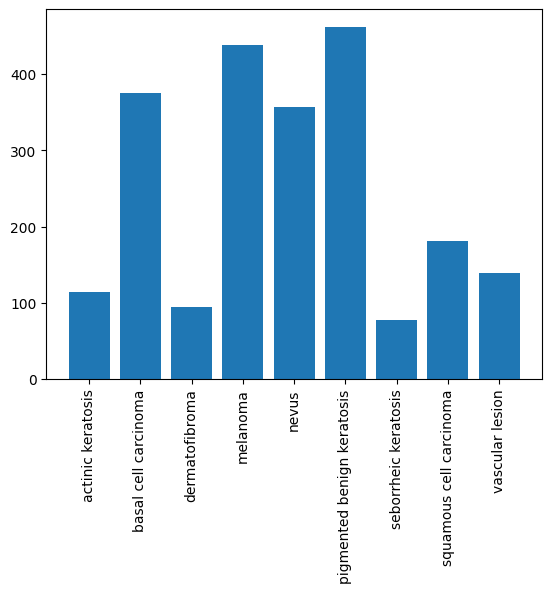

In [34]:
label_names = list(image_dict.keys())
label_count = list(image_dict.values())
import matplotlib.pyplot as plt
plt.bar(range(len(image_dict)), label_count, tick_label=label_names)
plt.xticks(rotation=90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? -** **Class "serborrheic keratosis" has least number of samples**.**
#### - Which classes dominate the data in terms proportionate number of samples?  **Class "melanoma" and "pigmented benign keratosis" dominate with more than 400 data points followed by "nevus" and "basal cell carcinoma" each having more than 300 samples**



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
path_to_training_dataset= "/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"  # we had already stored path in this variable "To do"
# here we are using string variable instead of Poxipath variable defined earlier
# reason being, inside for loop, class_name which is string is being added to this variable
#  path can not be Poxipath as operation '+' between Poxipath and string is not supported
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2B006B0A0>: 100%|██████████| 500/500 [00:27<00:00, 18.17 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2B01720E0>: 100%|██████████| 500/500 [00:29<00:00, 17.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2B003FB80>: 100%|██████████| 500/500 [00:23<00:00, 21.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF3216C4040>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FF2B02F4AC0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF2B0172170>: 100%|██████████| 500/500 [00:20<00:00, 24.09 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF2B02F6CE0>: 100%|██████████| 500/500 [00:47<00:00, 10.63 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF3202B4670>: 100%|██████████| 500/500 [00:18<00:00, 27.03 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF320156AD0>: 100%|██████████| 500/500 [00:20<00:00, 24.06 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [38]:
# this as expected : 9 classes X 500 images each = total 4500 total augmented images

### Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010023.jpg_2f3fce14-7d47-4567-86b3-8f86099b69da.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010611.jpg_2faf2eb7-ae23-4d1d-a422-beb56c6d2d1d.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010809.jpg_61526933-736f-4120-9e08-dfca5d6237bf.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010533.jpg_71c6ac20-2adb-479b-9b63-35590c8a48c9.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010410.jpg_fd764955-e481-473d-a83c-1d958a0b16f8.jpg',
 '/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011128.jpg_b4ac1

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [41]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [44]:
# classes look much more balanced now
# earlier, class with minimum data had only 77 data points while maixmum one had 462 datapoints
# thus, maximum data had more than 6 times data points of that contained in class with minimum data points
# with augmentation, maximum data points in class are 962 while minimum are 577
# thus maximum datapoints to minimumdata points ratio is less than 2
# even other classes look more balanced
# lets also make a plot to feel this visually

<Axes: >

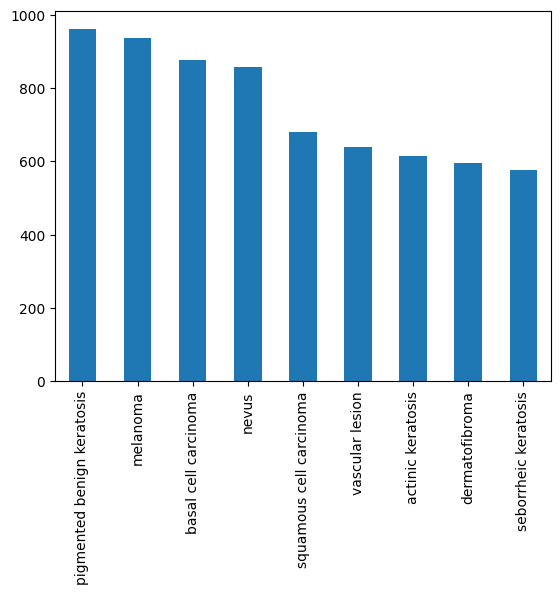

In [45]:

new_df.Label.value_counts().plot(kind='bar')

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [47]:
data_dir_train= pathlib.Path("/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")  # "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2, # 20% of data from training folder will be retained for validation purpose
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  label_mode = "categorical", # we are explictly specifying this parameter as we have categorical dataset. THis will also labels are encoded into categorical vectors for categorical entropy loss
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [48]:
# original number of files in training folder : 2239
# augmented images added : 4500
# total : 4500 + 2239 = 6739 images
# above number matches this figure

#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",  ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  label_mode = "categorical", # we are explictly specifying this parameter as we have categorical dataset. THis will also labels are encoded into categorical vectors for categorical entropy loss
  batch_size=batch_size)
# here, we are not using data from test directory
# only data from train directory being used (which underwent augmentation operation)
# out of total train data, 20% is being used for validation purpose and 80 % for training purpose

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
## your code goes here
from tensorflow.keras.layers import BatchNormalization
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), # normalization
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  # normalization
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  #layers.Dropout(0.25),


  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  #layers.Dropout(0.25),
  layers.Dense(2048, activation='relu'),
  #layers.Dropout(0.25),
  layers.Dense(1000, activation='relu'),
  #layers.Dropout(0.25),

  layers.Dense(num_classes, activation='softmax')
])
# normalization has been included
# we continue to neglect drop-out layer for same reasons discussed earlier
# we will call this as model3 for our future discussion

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here
## Your code goes here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### **Todo:**  Train your model

In [52]:
#epochs = 30
epochs = 50
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
169/169 [==============================] - 84s 398ms/step - loss: 3.4584 - accuracy: 0.2914 - val_loss: 2.7124 - val_accuracy: 0.1091
Epoch 2/50
169/169 [==============================] - 60s 351ms/step - loss: 1.6604 - accuracy: 0.3726 - val_loss: 2.7288 - val_accuracy: 0.1210
Epoch 3/50
169/169 [==============================] - 62s 364ms/step - loss: 1.5282 - accuracy: 0.4219 - val_loss: 2.2349 - val_accuracy: 0.2509
Epoch 4/50
169/169 [==============================] - 61s 358ms/step - loss: 1.4567 - accuracy: 0.4423 - val_loss: 1.5582 - val_accuracy: 0.4306
Epoch 5/50
169/169 [==============================] - 64s 371ms/step - loss: 1.3612 - accuracy: 0.4798 - val_loss: 1.6335 - val_accuracy: 0.4477
Epoch 6/50
169/169 [==============================] - 63s 366ms/step - loss: 1.3019 - accuracy: 0.5024 - val_loss: 2.0033 - val_accuracy: 0.3467
Epoch 7/50
169/169 [==============================] - 62s 360ms/step - loss: 1.1879 - accuracy: 0.5478 - val_loss: 1.6154 - val_ac

#### **Todo:**  Visualize the model results

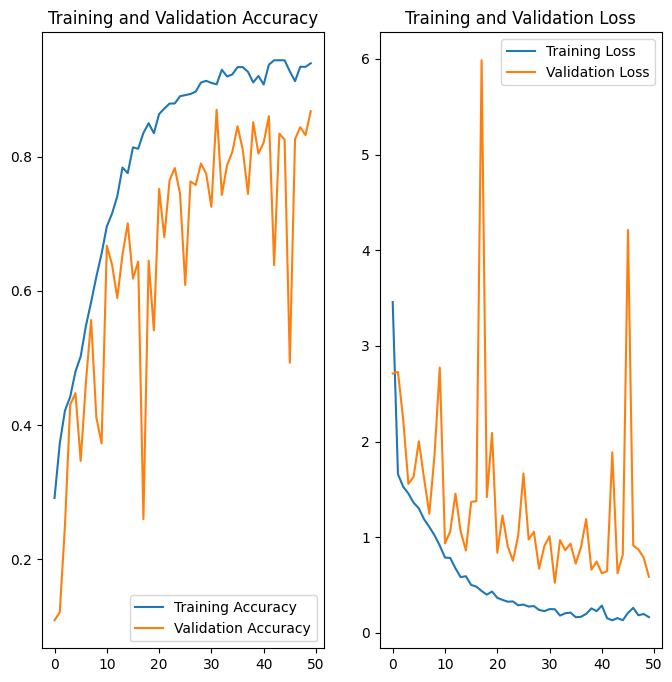

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [62]:
# observations : after augmentation, trainng accuracy is in the range of 90% or more.
# thus, there is no longer any underfitting
# thus, class rebalance has clearly helped addressing issues in the previous model
# validation accuracy also closely follows training accuracy
# looking at magnitude, training accuracy is in the range of 90% or more while validation accuracy is in the range of 80% more.
# at the end of 50th epoch : training accuracy : 93%  , validation accuracy : 86 %
# thus, model performs reasonably well on both train and test data
# thus, there is not much overfitting either
# thus, this model where class rabalancing and batch-normalization has been used, seems like a significant improvement over previous model.


  

In [61]:
# additional model building :
# the 3rd model we developed seems satisfactory as it has both high training and validation accuracy.
# however, as an experiment, we will build model 4 which will be same as model 3 but will use drop-out layers too
# this is just an additional experiment, as it was suggested earlier to use drop-out but we did not use it. 
# So this experimental model will also allow us to study impact of drop-out layer on model.

In [56]:
## your code goes here
from tensorflow.keras.layers import BatchNormalization
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), # normalization
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),  # normalization
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  layers.Dropout(0.25),


  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  layers.Dropout(0.25),


  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),     # normalization
  layers.MaxPooling2D(),
  layers.Dropout(0.25),


  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(2048, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(1000, activation='relu'),
  layers.Dropout(0.25),

  layers.Dense(num_classes, activation='softmax')
])
# normalization has been included
# we will call this as model4 for our future discussion

In [57]:
## your code goes here
## Your code goes here
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
#epochs = 30
epochs = 50
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
169/169 [==============================] - 99s 512ms/step - loss: 4.8975 - accuracy: 0.2231 - val_loss: 3.5082 - val_accuracy: 0.1158
Epoch 2/50
169/169 [==============================] - 85s 498ms/step - loss: 1.9334 - accuracy: 0.3236 - val_loss: 2.7948 - val_accuracy: 0.1047
Epoch 3/50
169/169 [==============================] - 84s 495ms/step - loss: 1.6774 - accuracy: 0.3767 - val_loss: 2.6044 - val_accuracy: 0.1663
Epoch 4/50
169/169 [==============================] - 84s 495ms/step - loss: 1.6269 - accuracy: 0.3906 - val_loss: 1.6880 - val_accuracy: 0.3370
Epoch 5/50
169/169 [==============================] - 89s 520ms/step - loss: 1.5675 - accuracy: 0.4067 - val_loss: 1.6638 - val_accuracy: 0.3942
Epoch 6/50
169/169 [==============================] - 86s 505ms/step - loss: 1.5063 - accuracy: 0.4241 - val_loss: 1.5706 - val_accuracy: 0.4128
Epoch 7/50
169/169 [==============================] - 86s 502ms/step - loss: 1.4558 - accuracy: 0.4512 - val_loss: 1.3935 - val_ac

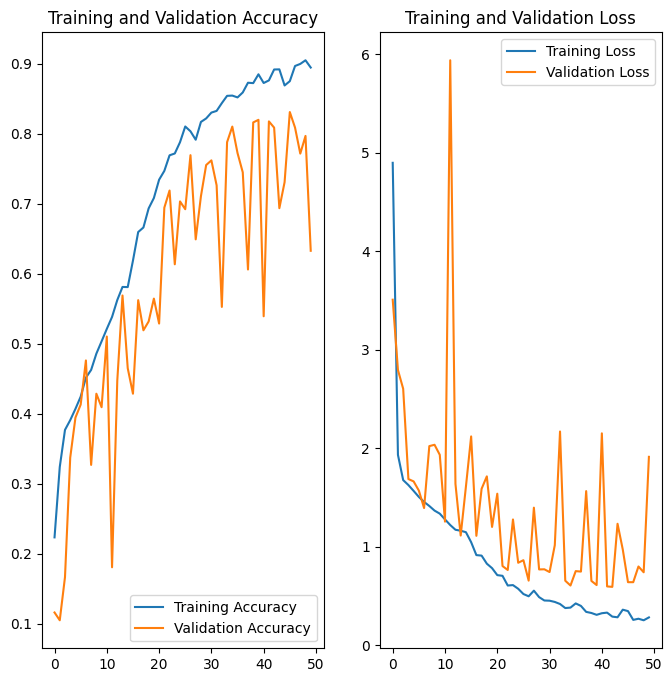

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [63]:
# observations : training accuracy is in the range of 89-90 % while validation accuracy is typically > 80%
# at the end of 50th epoch : training accuracy : 89 % while validation accuracy : 63 % 
# if we observe region between 30th to 50th epoch on the plot, we also see that model4 has higher variation for validation accuracy 
# consdiering these observations, model3 which is same as model4 but without drop-out layer seems better choice as model4 does not add any significant improvement over model3


## Conclusions
- # Models built :
- Total 4 models were built to solve the problem. Each model consists of 15 weight layers. However, 1st model did not have any drop-out layer, normalization layer, augmentation strategy. Also, it was trained on original data which had significant class imbalance. For 2nd model,augmentation strategy of randomflip and random rotation were used. It was also trained on original data which had significant class imbalance. 3rd model had batch normalization incoporated. Also, class imbalance was removed by adding 500 images of each class using augmentor package.MOdel4 is same as model3 but also has drop-out layer added.   
- # Comparison of Models :
- 1st and 2nd model had very low training as well as validation accuracy indicating underfitting. However, 3rd model gave satisfactory performance with training accuracy of more than 90%. Also, for 3rd model validation accuracy closely followed training accuracy indicating not much overfitting.4rth model did not seem to have any significant improvement over 3rd model.1st model and 2nd model are clearly not acceptable. 4rth model seems ok. However, 3rd model seems to be the best model.   
- # Possible reason for difference in performance of model :  
- The third model was trained on data where classes were balanced by adding 500 images to each class by using augmentor package. Also, batch normalization was used. Either of the two or both of these factors seem to have contributed to significant improvement in model performance compared to 1st and 2nd model. 4rth model made use of drop-out layer which does not seem to be giving any significant advantage in our case based upon model results. THus, key factor for model performance  seems to class rebalance and probabaly normalization to some extent.    

In [60]:
# checking versions of various libraries used as a reference
# key libraries and their versions are listed in read me file in git hub folder
! pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
Augmentor                     0.2.12
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
Cac